## Homework 2

## <em>Intro to Data Analysis, Dimensionality Reduction, and Clustering</em>
<br>
This notebook is arranged in cells. Texts are usually written in the markdown cells, and here you can use html tags (make it bold, italic, colored, etc). You can double click on this cell to see the formatting.<br>
<br>
The ellipsis (...) are provided where you are expected to write your solution but feel free to change the template (not over much) in case this style is not to your taste. <br>
<br>
<em>Hit "Shift-Enter" on a code cell to evaluate it.  Double click a Markdown cell to edit. </em><br>

### Imports

In [1]:
import numpy as np
import scipy as sp
from scipy.integrate import quad
from scipy.interpolate import UnivariateSpline
from math import lgamma
from matplotlib import cm
#For plotting
import matplotlib.pyplot as plt
%matplotlib inline

### Mounting Google Drive locally
Mount your Google Drive on your runtime using an authorization code.

Note: When using the 'Mount Drive' button in the file browser, no authentication codes are necessary for notebooks that have only been edited by the current user.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

***

#### Problem 1 - Fitting Gaussian Contours to a 2D Data

Gaussian distribution function plays a central role in statistics and is the most ubiquitous distribution in physics. It often provides a good approximation to the true probability density function (pdf) even in cases where its application is not strictly correct. <br><br>
In this problem, suppose that you have measured 1000 pairs of values $(x_1, y_1), ... , (x_{1000}, y_{1000})$ of two variables $x, y$. You saved these measurements to a .dat file ("Problem1_data.dat"). Plot their 1-dimensional pdf's and determine how well Gaussian pdf can approximate them. Compute the mean, variance, median, mode, 68% and 95% confidence intervals, and correlation coefficient.

<span style="color:blue"><i> 1. Plot 1-dimensional pdf for $x$, i.e. plot a normalized histogram. Make a reasonable choice for bin size - say 40 bins? </i></span> <br>

In [2]:
# Load a given 2D data
# data = np.loadtxt("/content/drive/My Drive/P188_288/P188_288_HW2/Problem1_data.dat")
data = np.loadtxt("/Users/elizabeth/Library/CloudStorage/GoogleDrive-elizabeth.donoway@gmail.com/.shortcut-targets-by-id/1N7VNzEhLpxeYFHjRpWdzVH2k_ZEUEjV6/P188_288/P188_288_HW2/Problem1_data.dat")
x = data[:,0]
y = data[:,1]

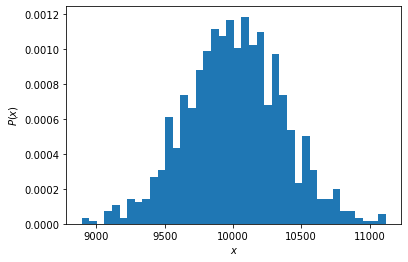

In [3]:
# Hint - https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html
plt.hist(x, bins=40, density=True)
plt.xlabel('$x$')
plt.ylabel('$P(x)$')
plt.show()

<span style="color:blue"> <i> 2. Calculate the mean, variance, and median of $x$. First, do it without using any in-built functions. Then, check your answers using in-built functions from numpy. </i></span>

In [4]:
def quicksort(array):
    """Sort the array using quicksort"""
    less = []
    equal = []
    greater = []

    if len(array) > 1:
        pivot = array[0]
        for x in array:
            if x < pivot:
                less.append(x)
            elif x == pivot:
                equal.append(x)
            elif x > pivot:
                greater.append(x)
        return quicksort(less)+equal+quicksort(greater)
    else:
        return array # return if array is only one element

In [5]:
mean1x=0
for xval in x:
    mean1x += xval
mean1x /= len(x)

var1x=0
varlist = [abs(xval - mean1x)**2 for xval in x]
for v in varlist:
    var1x += v
var1x /= len(x)

sorted_x = quicksort(x)
med1x=(sorted_x[len(x)//2 - 1] + sorted_x[len(x)//2])/2

mean2x = np.mean(x)
var2x = np.var(x)
med2x = np.median(x)

print(f'Mean: %0.3f, (Numpy: %0.3f)' %(mean1x, mean2x))
print(f'Variance: %0.3f, (Numpy: %0.3f)' %(var1x, var2x))
print(f'Median: %0.3f, (Numpy: %0.3f)' %(med1x, med2x))

Mean: 10011.594, (Numpy: 10011.594)
Variance: 125445.681, (Numpy: 125445.681)
Median: 10011.817, (Numpy: 10011.817)


<span style="color:blue"> <i> 3. Smoothly interpolate the discrete probability density from Part 1. Then, find the mode and symmetric 68%, 95% confidence intervals. (Suggestion - Read https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html and https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.UnivariateSpline.html)</i></span><br><br>


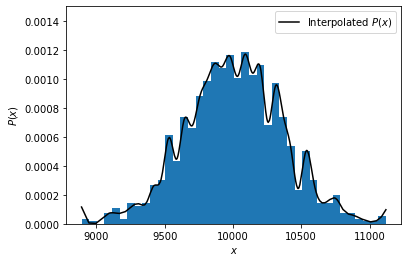

In [6]:
p, bin_edges = np.histogram(x, 40, density=True)
bin_centers = bin_edges[:-1] + (bin_edges[1] - bin_edges[0])/2

interp_x = UnivariateSpline(bin_centers, p, s=40)
interp_x.set_smoothing_factor(1.0e-8)

# Plot both histogram and interpolated function
plt.hist(x, bins=40, density=True)
plt.plot(sorted_x, interp_x(sorted_x), '-', label = "Interpolated $P(x)$", color='k')
plt.xlabel('$x$')
plt.ylabel('$P(x)$')
plt.ylim(0,0.0015)
plt.legend()
plt.show()

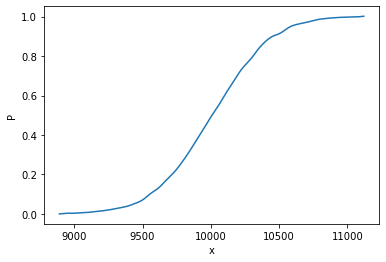

In [26]:
# Plot CDF for the above function to find mode and confidence interval
from scipy import integrate
xs = np.linspace(np.min(x),np.max(x),1000)
CDF_arr = integrate.cumulative_trapezoid(interp_x(sorted_x), sorted_x, initial=0)
plt.plot(sorted_x, CDF_arr)
plt.xlabel('x')
plt.ylabel('P')
plt.show()

In [20]:
def CDF(x):
    return integrate.quad(interp_x, sorted_x[0], x)[0]

In [29]:
from scipy import optimize
mode_idx = np.argmin(np.abs(CDF_arr-0.5))
mode = sorted_x[mode_idx]
sig1 = optimize.fsolve(lambda a :CDF(mode+a)-CDF(mode-a)-0.68, x0=np.sqrt(var2x))[0]
sig2 = optimize.fsolve(lambda a :CDF(mode+a)-CDF(mode-a)-0.95, x0=np.sqrt(var2x))[0]
# sig1p_idx = np.argmin(np.abs(CDF-(0.5+(0.68/2))))
# sig2p_idx = np.argmin(np.abs(CDF-(0.5+(0.95/2))))
# sig1p = sorted_x[sig1p_idx]-mode
# sig2p = sorted_x[sig2p_idx]-mode
print('Mode: %0.3f' %mode)
print('1 sigma: [%0.3f,%0.3f]' %(mode-sig1, mode+sig1))
print('2 sigma: [%0.3f,%0.3f]' %(mode-sig2, mode+sig2))

Mode: 10006.816
1 sigma: [9659.790,10353.842]
2 sigma: [9290.340,10723.292]


/var/folders/t8/7g7jdx3n3k922dx6x9y00dd40000gp/T/ipykernel_83333/2366624230.py:2: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(interp_x, sorted_x[0], x)[0]


Assuming that the distribution is Gaussian, 68% and 95% confidence interval corresponds to $\mu \pm 1\sigma$ and $\mu \pm 2\sigma$.  </i></span>

You should find that the Gaussian distribution is a reasonable approximation in this case.

<span style="color:blue"> <i> 4. Plot a Gaussian distribution with the mean and variance from Q2, on top of the probability density histogram from Q1. Make sure to label each plot. </i></span>

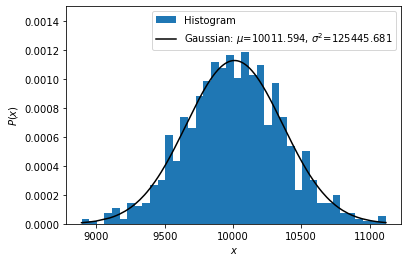

In [99]:
def gaussian(x, mu, sigma, amp=1):
    return amp/(sigma*np.sqrt(2*np.pi))*np.exp(-0.5*((x-mu)/sigma)**2)

plt.hist(x, bins=40, density=True, label='Histogram')

# Might have to change mean to mode because mean and mode of gaussian are the same?
plt.plot(quicksort(x), gaussian(quicksort(x), mean1x, np.sqrt(var1x)), color='k', label='Gaussian: $\mu$=%0.3f, $\sigma^2$=%0.3f' %(mean1x, var1x))
plt.xlabel('$x$')
plt.ylabel('$P(x)$')
plt.ylim(0,0.0015)
plt.legend()
plt.show()


<span style="color:blue"> <i> 5. Repeat part 1-4 for $y$.  </i></span>

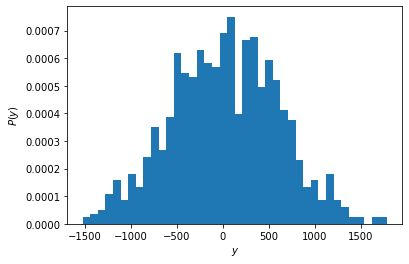

In [30]:
plt.hist(y, bins=40, density=True)
plt.xlabel('$y$')
plt.ylabel('$P(y)$')
plt.show()

In [31]:
mean1y=0
for yval in y:
    mean1y += yval
mean1y /= len(y)

var1y=0
varlist = [abs(yval - mean1y)**2 for yval in y]
for v in varlist:
    var1y += v
var1y /= len(y)

# med1y=0
sorted_y = quicksort(y)
med1y=(sorted_y[len(y)//2 - 1] + sorted_y[len(y)//2])/2

mean2y = np.mean(y)
var2y = np.var(y)
med2y = np.median(y)

print(f'Mean: %0.3f, (Numpy: %0.3f)' %(mean1y, mean2y))
print(f'Variance: %0.3f, (Numpy: %0.3f)' %(var1y, var2y))
print(f'Median: %0.3f, (Numpy: %0.3f)' %(med1y, med2y))

Mean: 25.825, (Numpy: 25.825)
Variance: 339007.305, (Numpy: 339007.305)
Median: 32.169, (Numpy: 32.169)


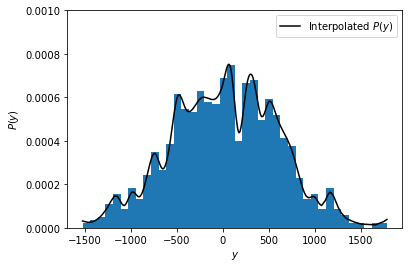

In [32]:
p, bin_edges = np.histogram(y, 40, density=True)
bin_centers = bin_edges[:-1] + (bin_edges[1] - bin_edges[0])/2

interp_y = UnivariateSpline(bin_centers, p, s=40)
interp_y.set_smoothing_factor(1.0e-8)

# Plot both histogram and interpolated function
plt.hist(y, bins=40, density=True)
plt.plot(sorted_y, interp_y(sorted_y), '-', label = "Interpolated $P(y)$", color='k')
plt.xlabel('$y$')
plt.ylabel('$P(y)$')
plt.ylim(0,0.0010)
plt.legend()
plt.show()

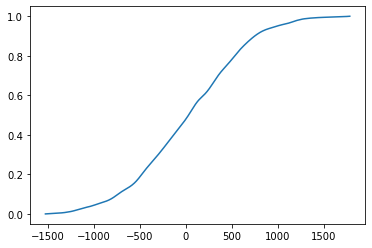

In [33]:
# Plot CDF for the above function to find mode and confidence interval
from scipy import integrate
# ys = np.linspace(np.min(y),np.max(y),1000)
CDF_arr = integrate.cumulative_trapezoid(interp_y(sorted_y), sorted_y, initial=0)
plt.plot(sorted_y, CDF_arr)
plt.show()

In [37]:
def CDF(y):
    return integrate.quad(interp_y, sorted_y[0], y)[0]

In [38]:
mode_idx = np.argmin(np.abs(CDF_arr-0.5))
mode = sorted_y[mode_idx]
sig1 = optimize.fsolve(lambda a :CDF(mode+a)-CDF(mode-a)-0.68, x0=np.sqrt(var2y))[0]
sig2 = optimize.fsolve(lambda a :CDF(mode+a)-CDF(mode-a)-0.95, x0=np.sqrt(var2y))[0]
print('Mode: %0.3f' %mode)
print('1 sigma: [%0.3f,%0.3f]' %(mode-sig1, mode+sig1))
print('2 sigma: [%0.3f,%0.3f]' %(mode-sig2, mode+sig2))

Mode: 30.066
1 sigma: [-547.687,607.819]
2 sigma: [-1132.214,1192.346]


/var/folders/t8/7g7jdx3n3k922dx6x9y00dd40000gp/T/ipykernel_83333/4077900172.py:2: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(interp_y, sorted_y[0], y)[0]


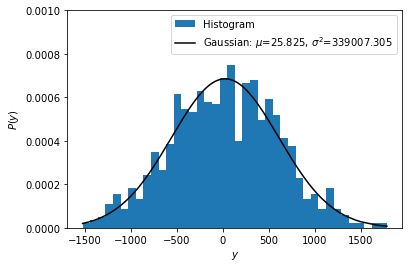

In [106]:
plt.hist(y, bins=40, density=True, label='Histogram')
plt.plot(quicksort(y), gaussian(quicksort(y), mean1y, np.sqrt(var1y)), color='k', label='Gaussian: $\mu$=%0.3f, $\sigma^2$=%0.3f' %(mean1y, var1y))
plt.xlabel('$y$')
plt.ylabel('$P(y)$')
plt.ylim(0,0.0010)
plt.legend()
plt.show()

<span style="color:blue"> <i> 6. First, compute the covariance ($C_{xy}$) of $x$ and $y$ as well as the correlation coefficient $\rho = \frac{C_{xy}}{\sigma_{x}\sigma_{y}}$. Print the results. Then, make a 2-d scatter plot of the dataset with few Gaussian contours (ellipses). </i></span>

In [95]:
def bivariate_gaussian(X, Y, sigma_x=1.0, sigma_y=1.0, mu_x=0.0, mu_y=0.0, v_xy=0.0):
    '''Bivariate Gaussian for two variables X and Y'''
    Xmu = X-mu_x
    Ymu = Y-mu_y

    rho = v_xy/(sigma_x*sigma_y)
    z = Xmu**2/sigma_x**2 + Ymu**2/sigma_y**2 - 2*rho*Xmu*Ymu/(sigma_x*sigma_y)
    pref_denom = 2*np.pi*sigma_x*sigma_y*np.sqrt(1-rho**2)
    return np.exp(-z/(2*(1-rho**2))) / pref_denom

Covariance of x and y: 166620.380
Correlation coefficient: 0.807


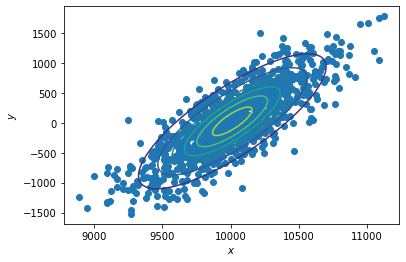

In [96]:
C_xy = np.cov(x,y)
corcoef = C_xy[1,0]/np.sqrt(C_xy[0,0]*C_xy[1,1])
print('Covariance of x and y: %0.3f' %C_xy[1,0])
print('Correlation coefficient: %0.3f' %corcoef)


X = np.linspace(9000, 11000, 100)
Y = np.linspace(-1500, 1500, 100)
X, Y = np.meshgrid(X, Y)

Z = bivariate_gaussian(X, Y, sigma_x=np.sqrt(C_xy[0,0]), sigma_y=np.sqrt(C_xy[1,1]), mu_x=mean1x, mu_y=mean1y, v_xy=C_xy[1,0])

plt.scatter(x, y)
plt.contour(X, Y, Z)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

The above contour plot is a bird eye view of the 3-d mesh plot; these are ellipses of equal probability. The coloring represents the intensity. Yellow central ellipse is the region of highest probability; the peak of 2-d Gaussian distribution is at the center of this ellipse. As we move away from the peak, the probability lowers.

***

#### Problem 2 - Central Limit Theorem

Plot the binomial distribution $P(N_A, N)$ for different values of $N$ and plot the Gaussian with mean and variance for the binomial. Similarly, plot the Poisson distribution with the mean varying from 1 to 10. See if both binomial and Poisson approach Gaussian as the mean/$N$ increases.<br><br>
(Reference - Kardar p. 41) For the binomial distribution, consider a random variable with two outcomes $A$ and $B$ of relative probabilities $p_A$ and $p_B = 1 - p_A$. The probability that in $N$ trials the event $A$ occurs exactly $N_A$ times is given by the binomial distribution:
$$ p_N(N_A) = \binom{N}{N_A} p_A^{N_A}(1-p_A)^{N-N_A}. $$
<br>
<span style="color:blue"> <i> 1. Plot the binomial distribution $P(N_A, N)$ for $N = 5, 20, 40, 100, 300$. In the same figure, plot the Gaussian with mean and variance for the binomial and see how similar they get as you increase $N$. Let $p_A = 0.5$ and $0.1$. Make sure to label each plot.  </i></span>

In [133]:
from scipy.special import binom

def binomial(p_A, N, N_A):
#     pref = np.exp(lgamma(N+1)/(lgamma(N_A+1) + lgamma(N-N_A+1)))
    pref = binom(N, N_A)
    return pref * p_A**N_A * (1-p_A)**(N-N_A)

In [342]:
binomial(142/256, 256, 142) * 2**256

5.8033849519986295e+75

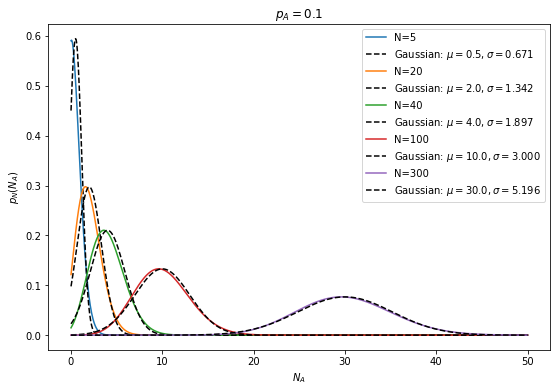

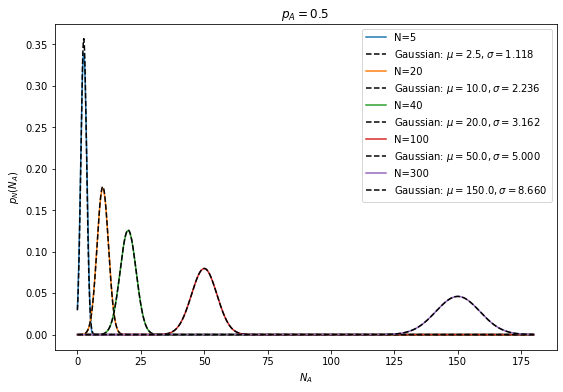

In [140]:
N = [5, 20, 40, 100, 300]

p_A = 0.1
N_A = np.linspace(0, 50, 1000)
plt.figure(figsize= (1.5*6, 6))
for n in N:
    mu_n = n*p_A
    sigma_n = np.sqrt(n*p_A*(1-p_A))
    plt.plot(N_A, binomial(p_A, n, N_A), label=f'N={n}')
    plt.plot(N_A, gaussian(N_A, mu_n, sigma_n), '--', label=f'Gaussian: $\mu={mu_n}, \sigma=%0.3f$'%sigma_n, color='k')
    plt.plot()
plt.legend()
plt.xlabel('$N_A$')
plt.ylabel('$p_N(N_A)$')
plt.title(f'$p_A = {p_A}$')
plt.show()

p_A = 0.5
N_A = np.linspace(0, 180, 1000)
plt.figure(figsize= (1.5*6, 6))
for n in N:
    mu_n = n*p_A
    sigma_n = np.sqrt(n*p_A*(1-p_A))
    plt.plot(N_A, binomial(p_A, n, N_A), label=f'N={n}')
    plt.plot(N_A, gaussian(N_A, mu_n, sigma_n), '--', label=f'Gaussian: $\mu={mu_n}, \sigma=%0.3f$'%sigma_n, color='k')
plt.legend()
plt.xlabel('$N_A$')
plt.ylabel('$p_N(N_A)$')
plt.title(f'$p_A = {p_A}$')
plt.show()

In class, we find that the binomial distribution is approximately normal (with mean $Np_A$ and variance $Np_A(1-p_A)$) as $N \rightarrow \infty$, by the central limit theorem. The proof of this theorem can be carried out using Stirling's approximation:
$$ N! \approx N^N e^{-N}\sqrt{2\pi N} $$
<br>
<span style="color:blue"><i> 2. Plot the above Stirling's formula approximation (i.e. Compare $N!$ with Stirling's approximation. Compute the residual: (actual-estimate)/actual.) </i></span><br>
(Hint: $\Gamma(n+1) = n!$)


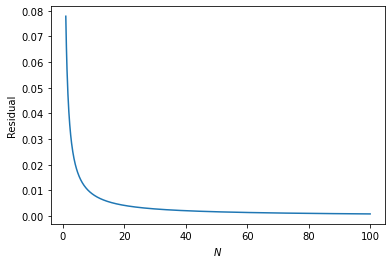

In [146]:
from scipy.special import gamma

Nvals = np.linspace(1, 100, 1000)

actual = gamma(Nvals+1)
estimate = np.float_power(Nvals, Nvals) * np.exp(-Nvals) * np.sqrt(2*np.pi*Nvals)

plt.plot(Nvals, (actual-estimate)/actual)
plt.xlabel('$N$')
plt.ylabel('Residual')
plt.show()

You should find that residual $\rightarrow 0$ as $N \rightarrow \infty$.

Next, consider the Poisson distribution (Kardar p. 42):
$$ P(\lambda) = \frac{\lambda^k e^{-\lambda}}{k!} $$
where $k$ is the number of occurrences. Its mean and variance are $\lambda$.<br><br>
<span style="color:blue"> <i> 3. Plot $P(\lambda)$ as a function of $k$ for $\lambda = 1, 3, 5, 10, 20$. In the same figure, plot the Gaussian with mean and variance for the Poisson and see how similar they get. Make sure to label. </i></span><br>

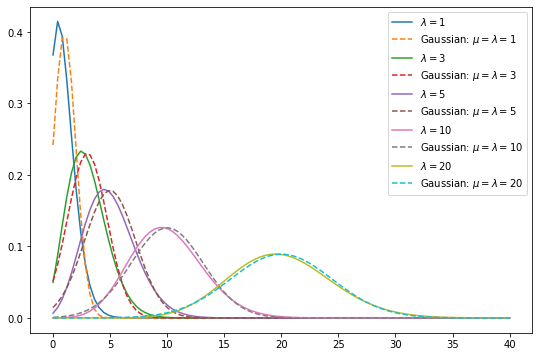

In [149]:
def poisson(k, L):
    return L ** k * np.exp(-L)/gamma(k+1)

L = [1,3,5,10,20]
k = np.linspace(0,40,100)
plt.figure(figsize= (1.5*6, 6))
for l in L:
    plt.plot(k, poisson(k,l), label=f'$\lambda={l}$')
    plt.plot(k, gaussian(k,l,np.sqrt(l)), '--', label=f'Gaussian: $\mu=\lambda={l}$')
plt.legend()
plt.show()

<span style="color:blue"> <i> 4. What happens as the mean/$N$ increases? </i></span><br>

<span style="color:blue"><i> Answer: </i></span><br>
As the mean increases, the Gaussian approximates the Poisson distribution better.

***

#### Problem 3 - Fitting Data to a Straight Line (Linear Regression)

(Reference - NR 15.2) We fit a set of 50 data points $(x_i, y_i)$ to a straight-line model $y(x) = a + bx$. The uncertainty $\sigma_i$ associated with each measurement $y_i$ is known, and we assume that the $x_i$'s are known exactly. To measure how well the model agrees with the data, we use the chi-square merti function: <br>
$$ \chi^2(a,b) = \sum_{i=0}^{N-1} \big( \frac{y_i-a-bx_i}{\sigma_i} \big)^2. $$
<br>
Make a scatter plot of data (including uncertainties) and find the best-fit line. Compute the errors on the two parameters $a$ and $b$ and plot lines where the two are changed by $\pm 1\sigma$.

<br>
<span style="color:blue"> <i> 1. Plot data (make sure to include error bars). (Hint - https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.errorbar.html) </i></span><br>


<span style="color:red"> NOTE: In this and all future assignments, you are expected to show error bars in all figures if the data include uncertainties. </span>

In [462]:
# Load a given 2D data
# data = np.loadtxt("/content/drive/My Drive/P188_288/P188_288_HW2/Problem3_data.dat")
data = np.loadtxt("/Users/elizabeth/Library/CloudStorage/GoogleDrive-elizabeth.donoway@gmail.com/.shortcut-targets-by-id/1N7VNzEhLpxeYFHjRpWdzVH2k_ZEUEjV6/P188_288/P188_288_HW2/Problem3_data.dat")
x = data[:,0]
y = data[:,1]
sig_y = data[:,2]

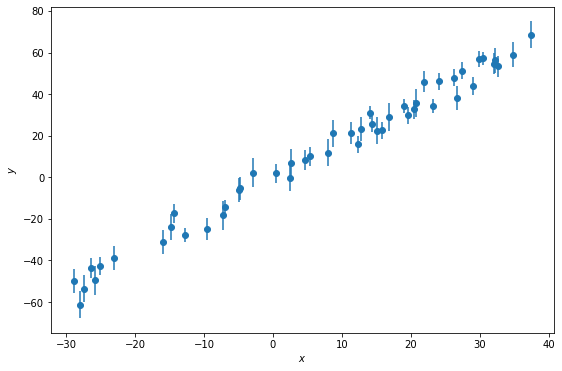

In [463]:
plt.figure(figsize=(9,6))
plt.errorbar(x, y, yerr=sig_y, marker='o', linestyle='')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

(NR p. 781) We should minimize the above chi-square function to determine $a$ and $b$. At its minimum, derivatives of $\chi^2$ with respect to $a, b$ vanish:
$$ \frac{\partial{\chi^2}}{\partial{a}} = -2 \sum \frac{y_i - a - bx_i}{\sigma_i^2} = 0 \ \ \ \ \ \ \ \ \ \ \ \ (1) $$
$$ \frac{\partial{\chi^2}}{\partial{b}} = -2 \sum \frac{x_i(y_i - a - bx_i)}{\sigma_i^2} = 0   \ \ \ \ \ \ \ \ \ (2) $$
<br>
These conditions can be rewritten in a convenient form if we define the following sums:
$$ S = \sum \frac{1}{\sigma_i^2},\ S_x = \sum \frac{x_i}{\sigma_i^2},\ S_y = \sum \frac{y_i}
{\sigma_i^2} $$
$$ S_{xx} = \sum \frac{x_i^2}{\sigma_i^2},\ S_{xy} = \sum \frac{x_iy_i}{\sigma_i^2} $$
<br> With these, we can rewrite (1), (2) as:
$$ a*S + b*S_x = S_y $$
$$ a*S_x + b*S_{xx} = S_{xy} $$
<br> The solution to these is calculated as:
$$ \Delta = SS_{xx} - (S_x)^2 $$ <br>
$$ a = \frac{S_{xx}S_y - S_xS_{xy}}{\Delta} $$
$$ b = \frac{SS_{xy} - S_xS_y}{\Delta} $$
<br><span style="color:blue"><i> 2. Find parameters $a, b$ which minimize the chi-square function and plot the best-fit line on top of the data. </i></span><br>

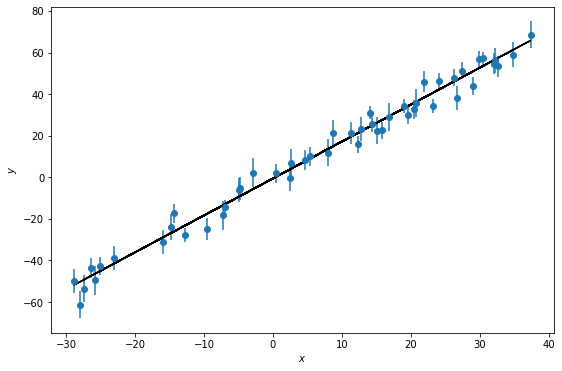

In [464]:
S = np.sum(1/sig_y**2)
Sx = np.sum(x/sig_y**2)
Sy = np.sum(y/sig_y**2)
Sxx = np.sum(x**2/sig_y**2)
Sxy = np.sum(x*y/sig_y**2)
Delta = S*Sxx - Sx**2
a = (Sxx*Sy - Sx*Sxy)/Delta
b = (S*Sxy-Sx*Sy)/Delta

plt.figure(figsize=(9,6))
plt.errorbar(x, y, yerr=sig_y, marker='o', linestyle='')
plt.plot(x, a+b*x, color='k')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

Now, we must estimate the probable uncertainties in the estimates of $a$ and $b$, since obviously the measurement errors in the data must introduce some uncertainty in the determination of those parameters. If the data are independent, then each contributes its own bit of uncertainty to the parameters. Consideration of propagation of errors show that the variance $\sigma_f^2$ in the value of any function will be 
$$ \sigma_f^2 = \sum \sigma_i^2 (\frac{\partial f}{\partial y_i})^2 $$
<br> For the straight line, the derivatives of $a$ and $b$ with respect to $y_i$ can be directly evaluated from the solution:
$$ \frac{\partial a}{\partial y_i} = \frac{S_{xx}-S_x x_i}{\sigma_i^2 \Delta} $$
$$ \frac{\partial b}{\partial y_i} = \frac{S x_i-S_x}{\sigma_i^2 \Delta} $$
<br> Summing over the points, we get
$$ \sigma_a^2 = S_{xx}/\Delta $$
$$ \sigma_b^2 = S/\Delta $$

<span style="color:blue"> <i> 3. Compute the errors ($\sigma_a, \sigma_b$) on the two parameters $a, b$ and plot lines where the two are changed by $\pm 1\sigma$.</i></span><br>
(Hint - Try to plot the 1$\sigma$ confidence band as in http://astropython.blogspot.com/2011/12/. You can use plt.fill_between to shade the region between plots.)

a = -0.595 ± 0.753
b = 1.775 ± 0.036


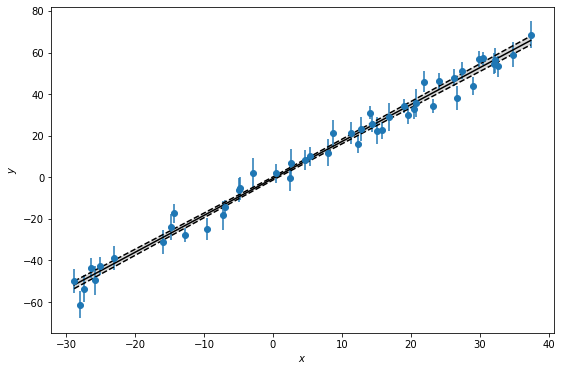

In [488]:
var_a = Sxx/Delta
var_b = S/Delta
sig_a = np.sqrt(var_a)
sig_b = np.sqrt(var_b)
print('a = %0.3f ± %0.3f' %(a,sig_a))
print('b = %0.3f ± %0.3f' %(b,sig_b))

# Something is definitely wrong here lol
xvals = np.linspace(np.min(x), np.max(x), 100)
plt.figure(figsize=(9,6))
plt.errorbar(x, y, yerr=sig_y, marker='o', linestyle='')
plt.plot(xvals, a+b*xvals, color='k')
upper_band = np.where(((a+sig_a)+(b+sig_b)*xvals)[:]>((a+sig_a)+(b-sig_b)*xvals)[:], ((a+sig_a)+(b+sig_b)*xvals), (a+sig_a)+(b-sig_b)*xvals)
lower_band = np.where(((a-sig_a)+(b+sig_b)*xvals)[:]<((a-sig_a)+(b-sig_b)*xvals)[:], ((a-sig_a)+(b+sig_b)*xvals), (a-sig_a)+(b-sig_b)*xvals)
plt.plot(xvals, upper_band, color='k', linestyle='dashed')
plt.plot(xvals, lower_band, color='k', linestyle='dashed')
plt.fill_between(xvals, lower_band, upper_band, alpha=0.3, facecolor='gray') 
# plt.plot(xvals, (a+sig_a)+(b+sig_b)*xvals, color='k', linestyle='dashed')
# plt.plot(xvals, (a+sig_a)+(b-sig_b)*xvals, color='k', linestyle='dashed')
# plt.plot(xvals, (a-sig_a)+(b+sig_b)*xvals, color='k', linestyle='dashed')
# plt.plot(xvals, (a-sig_a)+(b-sig_b)*xvals, color='k', linestyle='dashed')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

***

#### Problem 4 - Introduction to Supervised Learning

This problem will serve as an introduction to machine learning, and it will use 1-D data fitting as an example. The power of machine learning is far greater than demonstrated in this problem, but for this example, no special machine learning packages will be required, and you will write all of the required code.

The general goal of a supervised learning problem is to develop a model that can predict a label $y \in \mathcal{Y}$ from an input $x \in \mathcal{X}$ using existing sets of data $\{x_i, y_i\}_{i=1,...,n}$. When $\mathcal{Y}$ is discrete, this is called a classification problem, and when $\mathcal{Y}$ is continuous, this is called a regression problem.

We will use the very simple example of one-dimensional, real input and output, equivalently: $\mathcal{X}=\mathcal{Y}=\mathbb{R}$.

The model that is developed is called a *neural network*. The neural network is in general a flexible function $f_\phi: \mathcal{X} \rightarrow \mathcal{Y}$ which has internal parameters $\phi$. These parameters $\phi$ are *trained* in order to best predict the labels $y$ from the input $x$. In general, this network can be extremely complicated, especially when the input data is high-dimensional and/or has meaningful structure, but for this case, our neural network will just be a polynomial function of order $m$, and the model parameters $\phi$ are the coefficients:

$$f_\phi(x) = \phi_0 + \phi_1 x + \phi_2 x^2 + ... + \phi_m x^m.$$

<span style="color:blue"> <i> 4a. Write this general neural network function that takes in vectors $\phi$ and $x$. Make sure that this can be evaluated on a vector of x values, giving a vector of the same size. </i></span><br>


In [199]:
def poly_NN(phi, x):
    fx = [p*x**i for i, p in enumerate(phi)]
    return np.sum(fx, axis=0)

The goal of the training procedure for this neural network is made concrete via a *loss function* $\mathcal{L}(f_\phi(x), y)$. This function is a measure of how poorly the neural network predicts the output labels. In many cases, like this one, the *squared error* is used as a loss function:

$$\mathcal{L}(f_\phi(x), y)=(y-f_\phi(x))^2.$$

The goal of the training procedure is to minimize the expectation value of this loss function over the distribution from which the input data is drawn. We call this expectation value of the loss function the *risk*. The risk represents how bad you expect your model to be at predicting new data, so it is precisely what we want to minimize. For supervised learning, we have a sample of this data with labels of size $n$: $\{x_i, y_i\}_{i=1,...,n}$. We can approximate the risk as the average loss over our sample, which we call the *empirical risk*:

$$R_{emp}=\frac{1}{n}\sum\limits_{i=1}^{n}\mathcal{L}(f_\phi(x_i), y_i).$$

<span style="color:blue"> <i> 4b. Load the data (given) and write functions that compute the loss and the empirical risk from parameters $\phi$ and data $x$ with labels $y$. Be sure to allow vector input for $x$ and $y$.  </i></span><br>

In [195]:
# data = np.loadtxt("/content/drive/My Drive/P188_288/P188_288_HW2/Problem4_data.dat")
data = np.loadtxt("/Users/elizabeth/Library/CloudStorage/GoogleDrive-elizabeth.donoway@gmail.com/.shortcut-targets-by-id/1N7VNzEhLpxeYFHjRpWdzVH2k_ZEUEjV6/P188_288/P188_288_HW2/Problem4_data.dat")
x = data[0,:]
y = data[1,:]

In [259]:
def loss(x, y, phi):
    error = y - poly_NN(phi, x)
    return error**2

def risk(x, y, phi):
    n = len(x)
#     print(loss(x, y, phi))
    return 1/n * np.sum(loss(x, y, phi))

There are many minimization algorithms that can be used to minimize the risk, and we will see others later in this course, but one of the simplest and most well-known minimization algorithms is called gradient descent.

The gradient shows the direction of steepest increase in a function. The opposite direction is the direction of steepest decrease. Gradient descent simply starts at a random point and moves in the opposite direction of the gradient for a large number of iterations. In many situations, this will find the minimum.

In order to do this, we must first write a function to compute the gradient. We can accurately evaluate each component of the gradient using finite differencing:

$$\vec\nabla f = \sum_i \frac{df}{d\phi_i} \hat{\phi_i}$$

$$\frac{df}{d\phi_i}\approx\frac{f(\vec \phi + \delta \cdot \hat{\phi_i})-f(\vec \phi)}{\delta},$$

where $\hat{\phi_i}$ is the $i$th unit vector and $\delta$ is a very small number, we can use $\delta=10^{-4}$.

Now the gradient descent algorithm will begin with an initial set of parameters $\phi^0$ (not to be confused with the first element of $\phi$, $\phi_0$) and subtract a multiple of the gradient to reach the next step:

$$\phi^{i+1}=\phi^i-\lambda\nabla f(\phi^i)$$

$\lambda$ is called the learning rate, and I suggest to use $\lambda=0.5$. This process should iterate for some number of steps, say 1000.

<span style="color:blue"> <i> 4c. Write a function that computes a finite differenced gradient given that function $f$, initial input $\phi^0$, and stepsize $\delta$. Then write a function that runs gradient descent and outputs the set of parameters found for each iteration. Make sure it supports a general function $f$ to minimize, initial parameters $\phi^0$, learning rate $\lambda$, finite differencing stepsize $\delta$, and a number of iterations. </i></span><br>

In [283]:
# def finite_diff(f, phi, delta):
#     norm_phi = 1 # changed from norm(phi); I think the norm should always be 1?
#     print((f(phi + delta * norm_phi) - f(phi))/delta)
#     return (f(phi + delta * norm_phi) - f(phi))/delta

def grad(f, phi, delta):
    norm_phi = np.zeros(len(phi))
    fin_diff = np.zeros(len(phi))
    for i, p in enumerate(phi):
        norm_phi = np.zeros(len(phi))
        norm_phi[i]=1
        fin_diff += norm_phi*(f(phi + delta * norm_phi) - f(phi))/delta
    return fin_diff

def grad_descent(f, phi0, delta, l_lambda, n_iter):
    phi_next = phi0
    phis = [phi0]
    for i in range(n_iter):
        phi_next = phi_next - l_lambda*grad(f, phi_next, delta)
        phis.append(phi_next)
    return np.array(phis)

<span style="color:blue"> <i> 4d. Now we want to fit our data to a linear function. Run your gradient descent function (with $\phi^0=[0,0]$, $\lambda=0.5$, $\delta=10^{-4}$, and 1000 iterations) on the risk and plot the two parameters in a connected scatter plot that shows the progression of the gradient descent algorithm toward the best fit parameters. Plot the first and last point in separate colors. </i></span><br>
(Hint: you might want to use an anonymous/lambda function as the input to your gradient descent function so that you can specify the data $x$ and labels $y$ in the risk.)

In [288]:
phi0 = np.array([0.0,0.0])
l_lambda = 0.5
delta = 1e-4
n_iter = 1000

f = lambda phi : risk(x, y, phi)
phis = grad_descent(f, phi0, delta, l_lambda, n_iter)

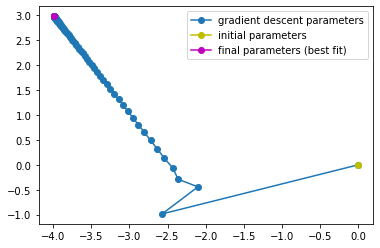

In [493]:
plt.plot(phis[:,0], phis[:,1], '-o', label='gradient descent parameters')
plt.plot(phis[0,0], phis[0,1], '-o', color='y', label='initial parameters')
plt.plot(phis[-1,0], phis[-1,1], '-o', color='m', label='final parameters (best fit)')
plt.legend()
plt.show()

<span style="color:blue"> <i> 4d. Now make a scatter plot of the data and draw the best fit line found by the last iteration of gradient descent. The input data $x$ is entirely within the interval $[0,1]$.</i></span><br>

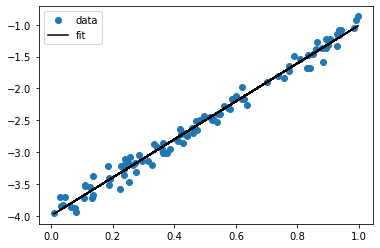

In [295]:
plt.plot(x, y, marker='o', linestyle='', label='data')
plt.plot(x, poly_NN(phis[-1], x), color='k', label='fit')
plt.legend()
plt.show()

Now let's try doing this again with a new dataset that has more complexity, but still with input $x \in [0,1]$. This time, we'll try increasing the number of parameters.

<span style="color:blue"> <i> 4e. Load the new data (given) and train neural networks for polynomials of order 1, 2, 3, and 4 ($m = 2,3,4,$ and $5$ terms, don't forget the constant term!). Increase the number of iterations to 10000 (this will take a few seconds to run but it helps to train the more complicated networks). Then plot the training data and the polynomials of these orders. Finally, compute and print the empirical risk for each model on the training data. </i></span><br>

In [296]:
# Load the data
# data = np.loadtxt("/content/drive/My Drive/P188_288/P188_288_HW2/Problem4_data.dat")
x2 = data[2,:]
y2 = data[3,:]

In [299]:
# I think a first order polynomial would be m=1, not m=2 b/c m=2 is second order in x... Ask about this...
phi1 = np.zeros(2)
phi2 = np.zeros(3)
phi3 = np.zeros(4)
phi4 = np.zeros(5)
phi5 = np.zeros(6)
l_lambda = 0.5
delta = 1e-4
n_iter = 10000

f = lambda phi : risk(x2, y2, phi)

phis1 = grad_descent(f, phi1, delta, l_lambda, n_iter)
phis2 = grad_descent(f, phi2, delta, l_lambda, n_iter)
phis3 = grad_descent(f, phi3, delta, l_lambda, n_iter)
phis4 = grad_descent(f, phi4, delta, l_lambda, n_iter)
phis5 = grad_descent(f, phi5, delta, l_lambda, n_iter)

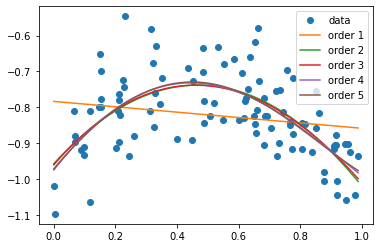

In [301]:
plt.plot(x2, y2, marker='o', linestyle='', label='data')
x2vals = np.linspace(np.min(x2), np.max(x2), 100)
plt.plot(x2vals, poly_NN(phis1[-1], x2vals), label='order 1')
plt.plot(x2vals, poly_NN(phis2[-1], x2vals), label='order 2')
plt.plot(x2vals, poly_NN(phis3[-1], x2vals), label='order 3')
plt.plot(x2vals, poly_NN(phis4[-1], x2vals), label='order 4')
plt.plot(x2vals, poly_NN(phis5[-1], x2vals), label='order 5')
plt.legend()
plt.show()

In [307]:
print('Risk (Order 1): %0.3f'%risk(x2, y2, phis1[-1]))
print('Risk (Order 2): %0.3f'%risk(x2, y2, phis2[-1]))
print('Risk (Order 3): %0.3f'%risk(x2, y2, phis3[-1]))
print('Risk (Order 4): %0.3f'%risk(x2, y2, phis4[-1]))
print('Risk (Order 5): %0.3f'%risk(x2, y2, phis5[-1]))

Risk (Order 1): 0.012
Risk (Order 2): 0.007
Risk (Order 3): 0.007
Risk (Order 4): 0.007
Risk (Order 5): 0.007


If you have too few parameters in your network, you may not be able to correctly capture the complexity and diversity of the data, and this will lead to inaccurate predictions. But too many parameters can also be problematic. In many cases, the actual data that you might want to predict with your neural network might have a broader scope than the training data. Because of this, you want to be sure not to overfit your data with a model with too many parameters. If you have too many parameters, you will fit more than the underlying signal; you will also fit the noise. This will lead to a poor fit to testing data.

Here you are given an expanded set of testing data, which is in the expanded interval $[0, 2]$.

<span style="color:blue"> <i> 4e. Load the new testing data (given) and plot it with the trained polynomials from the previous part in the expanded interval. Then compute and print the empirical risk for each model on the testing data. </i></span><br>

In [303]:
# Load the data
# data = np.loadtxt("/content/drive/My Drive/P188_288/P188_288_HW2/Problem4_data.dat")
x3 = data[4,:]
y3 = data[5,:]

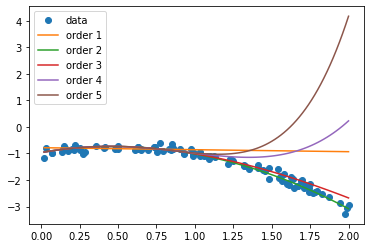

In [304]:
plt.plot(x3, y3, marker='o', linestyle='', label='data')
x3vals = np.linspace(np.min(x3), np.max(x3), 100)
plt.plot(x3vals, poly_NN(phis1[-1], x3vals), label='order 1')
plt.plot(x3vals, poly_NN(phis2[-1], x3vals), label='order 2')
plt.plot(x3vals, poly_NN(phis3[-1], x3vals), label='order 3')
plt.plot(x3vals, poly_NN(phis4[-1], x3vals), label='order 4')
plt.plot(x3vals, poly_NN(phis5[-1], x3vals), label='order 5')
plt.legend()
plt.show()

In [308]:
print('Risk (Order 1): %0.3f'%risk(x3, y3, phis1[-1]))
print('Risk (Order 2): %0.3f'%risk(x3, y3, phis2[-1]))
print('Risk (Order 3): %0.3f'%risk(x3, y3, phis3[-1]))
print('Risk (Order 4): %0.3f'%risk(x3, y3, phis4[-1]))
print('Risk (Order 5): %0.3f'%risk(x3, y3, phis5[-1]))

Risk (Order 1): 0.657
Risk (Order 2): 0.013
Risk (Order 3): 0.025
Risk (Order 4): 0.908
Risk (Order 5): 3.869


<span style="color:blue"> <i> 4f. Which neural network best predicts the labels for the testing data? </i></span><br>

<span style="color:blue"> <i> Answer: </i></span><br>
The order 2 neural network (quadratic in x) best predicts the labels for the testing data because it has the lowest risk.

***

#### Problem 5 - Unsupervised Learning: UMAP + clustering

Yann LeCun and collaborators collected and processed  70,000  handwritten digits to produce what became known as the most widely used database in ML, called MNIST. In this assignment, we are going to work with this dataset. Each handwritten digit comes in a square image, divided into a  28×28  pixel grid. Every pixel can take on  256  nuances of the gray color, interpolating between white and black, and hence each the data point assumes any value in the set  {0,1,…,255}. There are  10  categories in the problem, corresponding to the ten digits.

Ever since, the MNIST problem has become an important standard for benchmarking the performance of more sophisticated Machine Learning models. Often times, there are contests for finding a new constellation of hyperparameters and/or model architecture which results in a better accuracy for correctly classifying the digits.

In [39]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
X = mnist.data
Y = mnist.target

X = X.to_numpy()
Y = Y.to_numpy()

"$X$" contains information about the given MNIST digits. We have a 28x28 pixel grid, so each image is a vector of length 784; we have 70,000 images (digits), so $X$ is a 70,000x784 matrix. "$Y$" is a label (0-9; the category to which each image belongs) vector of length 70,000.

<span style="color:blue"> <i> 5a. Do the following:

(1) Randomly shuffle data (i.e. randomize the order)

  (Note: The label $Y_1$ corresponds to a vector $X_{1j}$, and even after shuffling, $Y_1$ should still correspond to $X_{1j}$.)
  
  
(2) Select 1/3 of the data. (You are free to work with a larger set of the data, but it will take much longer time to train.)


(3) Split data into training and test samples using train_test_split (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Set train_size = 0.8. (80% of $X$ is our training samples.) Print the dimension of training and test samples. </i></span> <br>

In [40]:
combined_data = np.column_stack((X, Y))
np.random.shuffle(combined_data)
X_shuff = combined_data[:, :-1]  # extract data (all columns except the last one)
Y_shuff = combined_data[:, -1]  # extract labels (last column)
data_subset = combined_data[:len(Y)//3]

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.utils import check_random_state

X_train, X_test, Y_train, Y_test = train_test_split(X_shuff[:len(Y)//3], Y_shuff[:len(Y)//3], train_size=0.8)
print(f'Dimension of training samples: X={np.shape(X_train)}, Y={np.shape(Y_train)}')
print(f'Dimension of testing samples: X={np.shape(X_test)}, Y={np.shape(Y_test)}')

Dimension of training samples: X=(18666, 784), Y=(18666,)
Dimension of testing samples: X=(4667, 784), Y=(4667,)


<span style="color:blue"> <i> 5b. Choose any five images and show what they look like. Also, print the corresponding label to each image. </i></span> <br>

Hint: each image is a vector of length 784. So reshape it into a 28x28 matrix.

&nbsp; **X_0 = X_train[0]** <br>
&nbsp; **X_0 = X_0.reshape((28, 28))**
  
Then, make a plot using imshow

&nbsp; **plt.imshow(X_0, cmap=plt.cm.gray)**

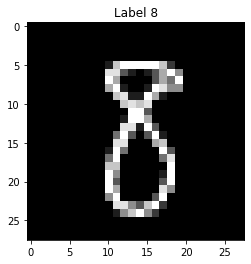

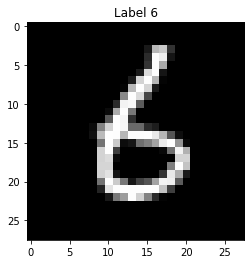

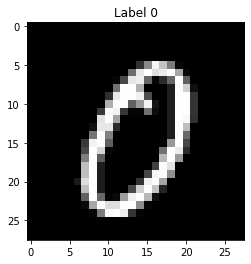

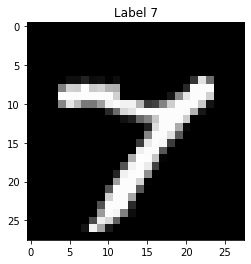

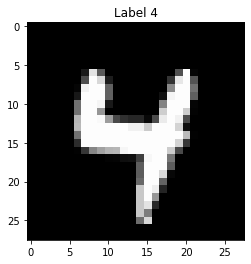

In [42]:
for i in range(5):
    X_i = np.array(X_train[i], dtype=float)
    X_i = X_i.reshape((28,28))
    plt.imshow(X_i, cmap=plt.cm.gray)
    plt.title(f'Label {Y_train[i]}')
    plt.show()

The following exercises are taken from the tutorial here: https://umap-learn.readthedocs.io/en/latest/index.html. Please go through them if you want to learn more about the umap package.

**UMAP** (Uniform Manifold Approximation and Projection for Dimension Reduction) is a general purpose manifold learning and dimension reduction algorithm. It is designed to be compatible with scikit-learn, making use of the same API and able to be added to sklearn pipelines. If you are already familiar with sklearn you should be able to use UMAP as a drop in replacement for t-SNE and other dimension reduction classes.

In [338]:
!pip install umap-learn
import umap

     |████████████████████████████████| 88 kB 3.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 18.2 MB/s eta 0:00:01
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=e919610361c8b311f35e424ad4bacd47b3f4c1d4090e51b2fee4150daff7de44
  Stored in directory: /Users/elizabeth/Library/Caches/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55638 sha256=839bfacd828ddbd2454de97e71a3495d6d659b8a245ba00cc7811021e8fe2787
  Stored in directory: /Users/elizabeth/Library/Caches/pip/wheels/f8/32/54/fa1fd0454e0441eaa32550ea2a86da3f64eb7c8e5a82436770
Successfully built umap-learn pynndescent


While UMAP can be used for standard unsupervised dimension reduction the algorithm offers significant flexibility allowing it to be extended to perform other tasks, including making use of categorical label information to do supervised dimension reduction, and even metric learning.

Let's use labels ("$Y$") to do supervised learning.

How do we go about coercing UMAP to make use of target labels? If you are familiar with the sklearn API you’ll know that the fit() method (here, you can think of "fitting" as "training.") takes a target parameter y that specifies supervised target information (for example when training a supervised classification model). We can simply pass the UMAP model that target data when fitting and it will make use of it to perform supervised dimension reduction!

First, define your UMAP model:

&nbsp; **model = umap.UMAP()**

Then, using "fit_transform," fit your training sample into an embedded space, with the target array ("Y") for supervised dimension reduction specified.

&nbsp; **embedding_train = model.fit_transform(training X data, training Y label)**

You can use this trained model to transform new data - which is "test data" in this case.

&nbsp; **embedding_test = model.transform(test X data)**

By default, data has reduced down to 2 dimensions. (i.e. embedding_test will have dimensions = (# of test data, 2) - it is an array with test samples, but with 2 feature columns. Each row of the array is a 2-dimensional representation of the corresponding digit.) Thus we can plot the embedding as a standard scatterplot and color by the target array (since it applies to the transformed data which is in the same order as the original).

&nbsp; **plt.scatter(embedding[:, 0], embedding[:, 1], ...)**

<span style="color:blue"> <i> 5c. Do the supervised learning and create scatterplots for both training and test data. Color data points according to the corresponding target array $Y$. Make sure to label all 10 classes. Are they cleanly separated?</i></span> <br>


In [360]:
model = umap.UMAP()
embedding_train = model.fit_transform(X_train, Y_train)
embedding_test = model.transform(X_test)

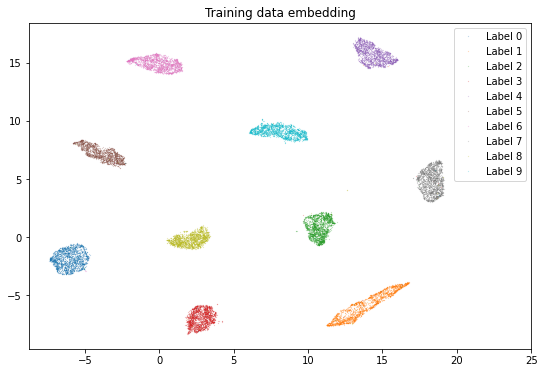

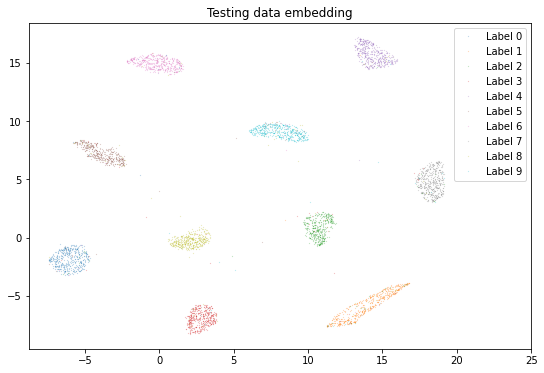

In [422]:
plt.figure(figsize=(9,6))
for i in range(10):
    plt.plot(embedding_train[:,0][Y_train==f'{i}'], embedding_train[:,1][Y_train==f'{i}'], marker='o', linestyle='', ms=0.1, label=f'Label {i}')
plt.xlim(right=25)
plt.legend()
plt.title('Training data embedding')
plt.show()

plt.figure(figsize=(9,6))
for i in range(10):
    plt.plot(embedding_test[:,0][Y_test==f'{i}'], embedding_test[:,1][Y_test==f'{i}'], marker='o', linestyle='', ms=0.1, label=f'Label {i}')
plt.xlim(right=25)
plt.legend()
plt.title('Testing data embedding')
plt.show()

UMAP has several hyperparameters that can have a significant impact on the resulting embedding: n_neighbors, min_dist, n_components, and metric. (https://umap-learn.readthedocs.io/en/latest/parameters.html)

Each of these parameters has a distinct effect, and we will look at n_neighbors and n_components.

**n_neighbors** controls how UMAP balances local versus global structure in the data. It does this by constraining the size of the local neighborhood UMAP will look at when attempting to learn the manifold structure of the data. This means that low values of n_neighbors will force UMAP to concentrate on very local structure (potentially to the detriment of the big picture), while large values will push UMAP to look at larger neighborhoods of each point when estimating the manifold structure of the data, losing fine detail structure for the sake of getting the broader of the data.

We can see that in practice by fitting our dataset with UMAP using a range of n_neighbors values. The default value of n_neighbors for UMAP (as used above) is 15.

<span style="color:blue"> <i> 5d. Choose n_neighbors=2 and n_neighbors=200. What happens as we increase n_neighbors? </i></span> <br>

2 nearest neighbors:

In [383]:
model_2NN = umap.UMAP(n_neighbors=2)
embedding_train_2NN = model_2NN.fit_transform(X_train, Y_train)
embedding_test_2NN = model_2NN.transform(X_test)

/Users/elizabeth/opt/miniconda3/envs/orensteinlab/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/Users/elizabeth/opt/miniconda3/envs/orensteinlab/lib/python3.8/site-packages/umap/spectral.py:260: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/elizabeth/opt/miniconda3/envs/orensteinlab/lib/python3.8/site-packages/umap/spectral.py:260: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/elizabeth/opt/miniconda3/envs/orensteinlab/lib/python3.8/site-packages/umap/spectral.py:260: UserWarning: W

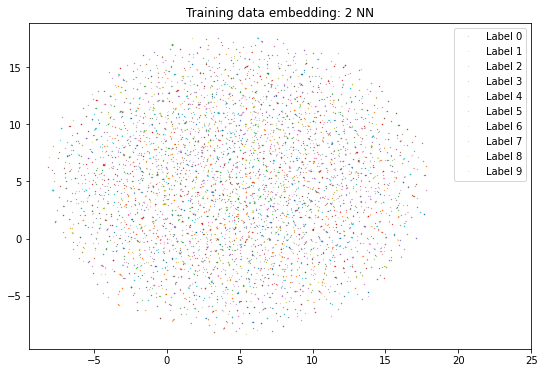

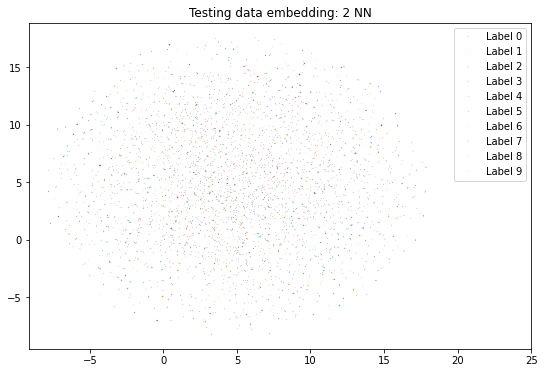

In [423]:
plt.figure(figsize=(9,6))
for i in range(10):
    plt.plot(embedding_train_2NN[:,0][Y_train==f'{i}'], embedding_train_2NN[:,1][Y_train==f'{i}'], marker='o', linestyle='', ms=0.1, label=f'Label {i}')
plt.xlim(right=25)
plt.legend()
plt.title('Training data embedding: 2 NN')
plt.show()

plt.figure(figsize=(9,6))
for i in range(10):
    plt.plot(embedding_test_2NN[:,0][Y_test==f'{i}'], embedding_test_2NN[:,1][Y_test==f'{i}'], marker='o', linestyle='', ms=0.1, label=f'Label {i}')
plt.xlim(right=25)
plt.legend()
plt.title('Testing data embedding: 2 NN')
plt.show()

200 nearest neighbors:

In [385]:
model_200NN = umap.UMAP(n_neighbors=200)
embedding_train_200NN = model_200NN.fit_transform(X_train, Y_train)
embedding_test_200NN = model_200NN.transform(X_test)

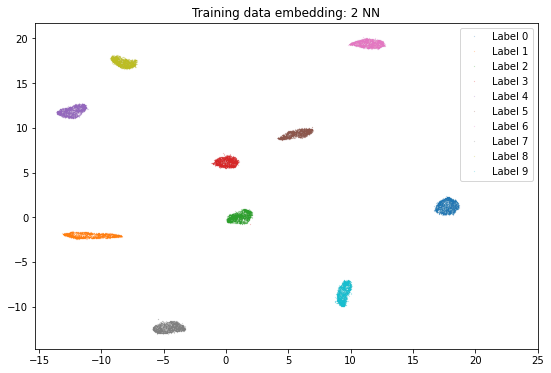

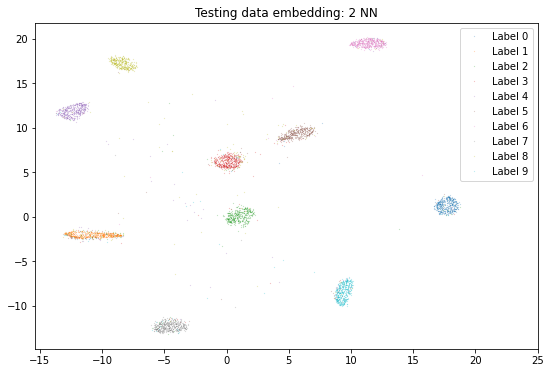

In [424]:
plt.figure(figsize=(9,6))
for i in range(10):
    plt.plot(embedding_train_200NN[:,0][Y_train==f'{i}'], embedding_train_200NN[:,1][Y_train==f'{i}'], marker='o', linestyle='', ms=0.1, label=f'Label {i}')
plt.xlim(right=25)
plt.legend()
plt.title('Training data embedding: 2 NN')
plt.show()

plt.figure(figsize=(9,6))
for i in range(10):
    plt.plot(embedding_test_200NN[:,0][Y_test==f'{i}'], embedding_test_200NN[:,1][Y_test==f'{i}'], marker='o', linestyle='', ms=0.1, label=f'Label {i}')
plt.xlim(right=25)
plt.legend()
plt.title('Testing data embedding: 2 NN')
plt.show()

With a value of n_neighbors=2 we see that UMAP merely glues together small chains, but due to the narrow/local view, fails to see how those connect together. It also leaves many different components (and even singleton points). This represents the fact that from a fine detail point of view the data is very disconnected and scattered throughout the space.

As n_neighbors is increased UMAP manages to see more of the overall structure of the data, gluing more components together, and better coverying the broader structure of the data. By the stage of n_neighbors=20 we have a fairly good overall view of the data showing how the various colors interelate to each other over the whole dataset.

As n_neighbors increases further more and more focus in placed on the overall structure of the data. This results in, with n_neighbors=200 a plot where the overall structure is well captured, but at the loss of some of the finer local sturcture.

***

As is standard for many scikit-learn dimension reduction algorithms UMAP provides a **n_components** parameter option that allows the user to determine the dimensionality of the reduced dimension space we will be embedding the data into. Unlike some other visualisation algorithms such as t-SNE UMAP scales well in embedding dimension, so you can use it for more than just visualisation in 2- or 3-dimensions.

For the purposes of this demonstration (so that we can see the effects of the parameter) we will only be looking at 1-dimensional and 3-dimensional embeddings, which we have some hope of visualizing.

First of all we will set n_components to 1, forcing UMAP to embed the data in a line. For visualisation purposes we will randomly distribute the data on the y-axis to provide some separation between points.

<span style="color:blue"> <i> 5e. Choose n_components=1 and n_components=3. Observe the scatterplots. </i></span> <br>

In [387]:
from mpl_toolkits.mplot3d import Axes3D

In [414]:
model_1c = umap.UMAP(n_components=1)
embedding_train_1c = model_1c.fit_transform(X_train, Y_train)
embedding_test_1c = model_1c.transform(X_test)

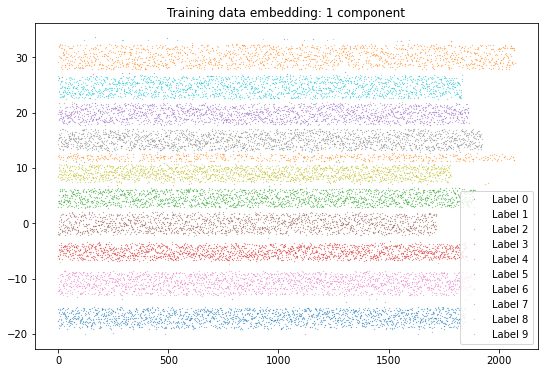

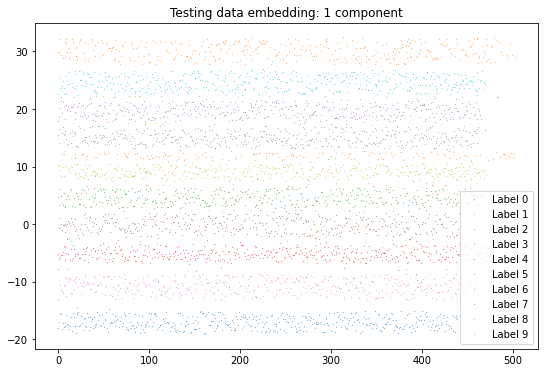

In [447]:
plt.figure(figsize=(9,6))
for i in range(10):
    plt.plot(embedding_train_1c[Y_train==f'{i}'], marker='o', linestyle='', ms=0.2, label=f'Label {i}')
plt.legend()
plt.title('Training data embedding: 1 component')
plt.show()

plt.figure(figsize=(9,6))
for i in range(10):
    plt.plot(embedding_test_1c[Y_test==f'{i}'], marker='o', linestyle='', ms=0.2, label=f'Label {i}')
plt.legend()
plt.title('Testing data embedding: 1 component')
plt.show()

In [44]:
model_3c = umap.UMAP(n_components=3)
embedding_train_3c = model_3c.fit_transform(X_train, Y_train)
embedding_test_3c = model_3c.transform(X_test)

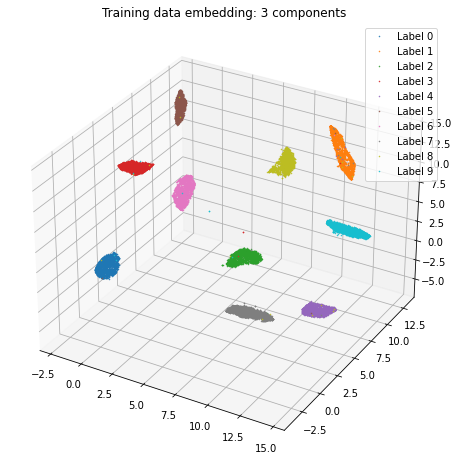

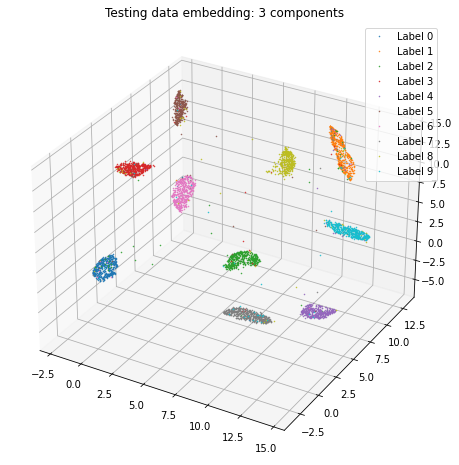

In [45]:
x_3c, y_3c, z_3c = embedding_train_3c[:,0], embedding_train_3c[:,1], embedding_train_3c[:,2]

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(projection='3d')
for i in range(10):
    ax.plot(x_3c[Y_train==f'{i}'], y_3c[Y_train==f'{i}'], z_3c[Y_train==f'{i}'], marker='o', linestyle='', ms=0.5, label=f'Label {i}')
ax.legend()
plt.title('Training data embedding: 3 components')
plt.show()

x_3c, y_3c, z_3c = embedding_test_3c[:,0], embedding_test_3c[:,1], embedding_test_3c[:,2]

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(projection='3d')
for i in range(10):
    ax.plot(x_3c[Y_test==f'{i}'], y_3c[Y_test==f'{i}'], z_3c[Y_test==f'{i}'], marker='o', linestyle='', ms=0.5, label=f'Label {i}')
ax.legend()
plt.title('Testing data embedding: 3 components')
plt.show()

UMAP is useful for generating visualisations, but if you want to make use of UMAP more generally for machine learning tasks it is important to be be able to train a model and then later pass new data to the model and have it transform that data into the learned space. For example if we use UMAP to learn a latent space and then train a classifier on data transformed into the latent space then the classifier is only useful for prediction if we can transform data for which we want a prediction into the latent space the classifier uses. Fortunately UMAP makes this possible, albeit more slowly than some other transformers that allow this.

To make use of UMAP as a data transformer we first need to fit the model with the training data. In this case we simply hand it the training data and it will learn an appropriate (two dimensional by default) embedding.

&nbsp; **model = umap.UMAP()**

&nbsp; **embedding_train_unsupervised = model.fit_transform(training X data)**

&nbsp; **embedding_test_unsupervised = model.transform(test X data)**

<span style="color:blue"> <i> 5f. Do the unsupervised learning and create scatterplots for both training and test data. Color data points according to the corresponding target array $Y$. Make sure to label all 10 classes. Compared to Part 3, how did they perform? Also, has the test data been embedded into 2 dimensions in exactly the locations we should expect (by class) given the embedding of the training data? </i></span> <br>

The unsupervised learning performed worse than the supervised learning (evidenced by the overlap of some of the classes in the embedding). However, the test data has been embedded in 2 dimensions in the same locations we should expect given the embedding of the training data. This makes sense because the model is still classifying the data (i.e. learning how to separate the data into different classes, even though we did not provide the labels).

In [448]:
model_us = umap.UMAP()
embedding_train_unsupervised = model_us.fit_transform(X_train)
embedding_test_unsupervised = model_us.transform(X_test)

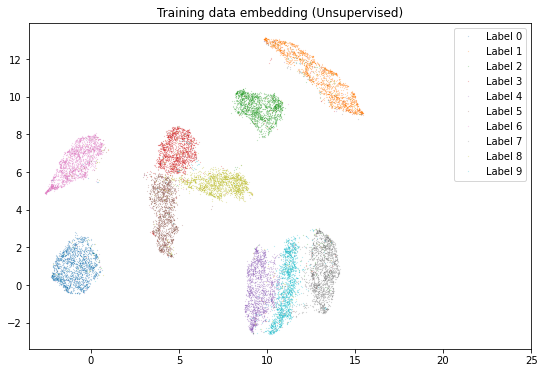

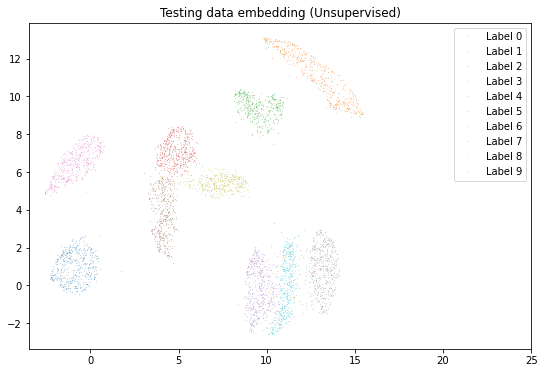

In [449]:
plt.figure(figsize=(9,6))
for i in range(10):
    plt.plot(embedding_train_unsupervised[:,0][Y_train==f'{i}'], embedding_train_unsupervised[:,1][Y_train==f'{i}'], marker='o', linestyle='', ms=0.1, label=f'Label {i}')
plt.xlim(right=25)
plt.legend()
plt.title('Training data embedding (Unsupervised)')
plt.show()

plt.figure(figsize=(9,6))
for i in range(10):
    plt.plot(embedding_test_unsupervised[:,0][Y_test==f'{i}'], embedding_test_unsupervised[:,1][Y_test==f'{i}'], marker='o', linestyle='', ms=0.1, label=f'Label {i}')
plt.xlim(right=25)
plt.legend()
plt.title('Testing data embedding (Unsupervised)')
plt.show()

UMAP can be used as an effective preprocessing step to boost the performance of density based clustering. This is somewhat controversial, and should be attempted with care. For a good discussion of some of the issues involved in this please see the various answers in this stackoverflow thread (https://stats.stackexchange.com/questions/263539/clustering-on-the-output-of-t-sne) on clustering the results of t-SNE. Many of the points of concern raised there are salient for clustering the results of UMAP. The most notable is that UMAP, like t-SNE, does not completely preserve density. UMAP, like t-SNE, can also create tears in clusters that are not actually present, resulting in a finer clustering than is necessarily present in the data. Despite these concerns there are still valid reasons to use UMAP as a preprocessing step for clustering. As with any clustering approach one will want to do some exploration and evaluation of the clusters that come out to try to validate them if possible.

With all of that said, let’s work through an example to demonstrate the difficulties that can face clustering approaches and how UMAP can provide a powerful tool to help overcome them.

<span style="color:blue"> <i> 5g. Let's do unsupervised learning and identify distinct classes with the help of UMAP: </i></span> <br>

(1) First, reduce the data to 2-dimensions using UMAP. Do unsupervised learning on the training data. Choose "n_neighbors=30,min_dist=0.0,random_state=42"

For clustering, try HDBSCAN, which we believe to be among the most advanced density based tehcniques. 

(2) Create the HDBSCAN model (You can change the hyperparameter setting):

&nbsp; **HDBSCAN_model = hdbscan.HDBSCAN(min_samples=10,min_cluster_size=100)**

(3) Take the embedding you created in (1) and get predicted classes using "fit_predict"

&nbsp; **HDBSCAN_labels = HDBSCAN_model.fit_predict(embedding)**

(4) Predicted label = -1 means that HDBSCAN refused to cluster that points and classify the as “noise.” Make the scatterplot in 2d using umap embedding and color points according to the cluster membership. Color noise as gray.

In [450]:
!pip install hdbscan
import hdbscan

     |████████████████████████████████| 5.2 MB 4.6 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp38-cp38-macosx_11_0_arm64.whl size=623807 sha256=debbb153775cc44201d3106615682bdcbd709aee09830ba5b1c5ef07897d3146
  Stored in directory: /Users/elizabeth/Library/Caches/pip/wheels/72/93/36/3c7c74a6f2127e71810a0e0f535955175556a434aec55de679
Successfully built hdbscan


In [55]:
model_us = umap.UMAP(n_neighbors=30,min_dist=0.0,random_state=42)
embedding_train_us = model_us.fit_transform(X_train)
embedding_test_us = model_us.transform(X_test)

HDBSCAN_model = hdbscan.HDBSCAN(min_samples=10,min_cluster_size=100)

HDBSCAN_labels = HDBSCAN_model.fit_predict(embedding_train_us)

HDBSCAN_labels_test = HDBSCAN_model.fit_predict(embedding_test_us)

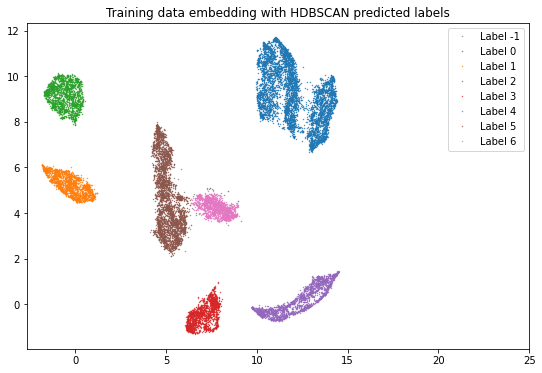

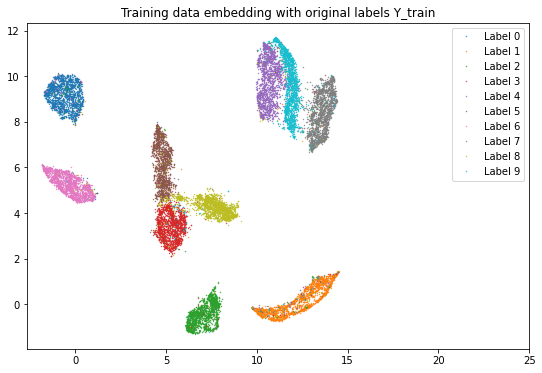

In [56]:
u = np.unique(HDBSCAN_labels)
plt.figure(figsize=(9,6))
for i in u:
    if i != -1:
        plt.plot(embedding_train_us[:,0][HDBSCAN_labels==i], embedding_train_us[:,1][HDBSCAN_labels==i], marker='o', linestyle='', ms=0.4, label=f'Label {i}')
    else:
        plt.plot(embedding_train_us[:,0][HDBSCAN_labels==i], embedding_train_us[:,1][HDBSCAN_labels==i], marker='o', linestyle='', ms=0.4, color='gray', label=f'Label {i}')
plt.xlim(right=25)
plt.legend()
plt.title('Training data embedding with HDBSCAN predicted labels')
plt.show()

plt.figure(figsize=(9,6))
for i in range(10):
    plt.plot(embedding_train_us[:,0][Y_train==f'{i}'], embedding_train_us[:,1][Y_train==f'{i}'], marker='o', linestyle='', ms=0.4, label=f'Label {i}')
plt.xlim(right=25)
plt.legend()
plt.title('Training data embedding with original labels Y_train')
plt.show()

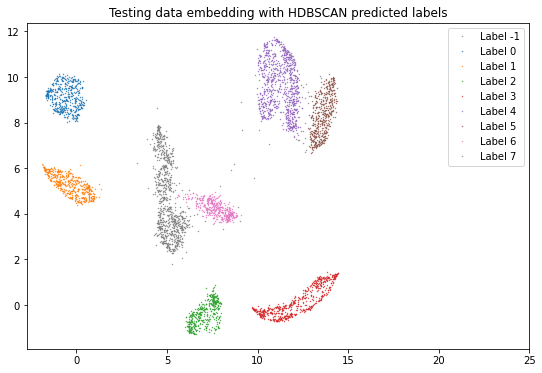

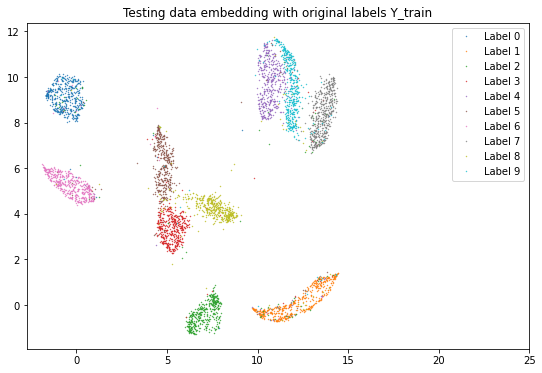

In [57]:
u = np.unique(HDBSCAN_labels_test)
plt.figure(figsize=(9,6))
for i in u:
    if i != -1:
        plt.plot(embedding_test_us[:,0][HDBSCAN_labels_test==i], embedding_test_us[:,1][HDBSCAN_labels_test==i], marker='o', linestyle='', ms=0.4, label=f'Label {i}')
    else:
        plt.plot(embedding_test_us[:,0][HDBSCAN_labels_test==i], embedding_test_us[:,1][HDBSCAN_labels_test==i], marker='o', linestyle='', ms=0.4, color='gray', label=f'Label {i}')
plt.xlim(right=25)
plt.legend()
plt.title('Testing data embedding with HDBSCAN predicted labels')
plt.show()

plt.figure(figsize=(9,6))
for i in range(10):
    plt.plot(embedding_test_us[:,0][Y_test==f'{i}'], embedding_test_us[:,1][Y_test==f'{i}'], marker='o', linestyle='', ms=0.4, label=f'Label {i}')
plt.xlim(right=25)
plt.legend()
plt.title('Testing data embedding with original labels Y_train')
plt.show()

<span style="color:blue"> <i> 5h. Evaluate the adjusted Rand score (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html) and adjusted mutual information (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_mutual_info_score.html) for this clustering as compared with the true labels. </i></span> <br>

(Note: Changing the hyperparameters of UMAP/HDBSCAN model and increasing the total number of sample, you can improve those scores. You can check this if you have time.) 

In [51]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

In [52]:
ars = adjusted_rand_score(Y_train, HDBSCAN_labels)
amis = adjusted_mutual_info_score(Y_train, HDBSCAN_labels)
print('Adjusted Rand score (train):', ars)
print('Adjusted mutual info score (train):', amis)

ars = adjusted_rand_score(Y_test, HDBSCAN_labels_test)
amis = adjusted_mutual_info_score(Y_test, HDBSCAN_labels_test)
print('Adjusted Rand score (test):', ars)
print('Adjusted mutual info score (test):', amis)

Adjusted Rand score (train): 0.5950625477524315
Adjusted mutual info score (train): 0.7804964389601396
Adjusted Rand score (test): 0.711151327449841
Adjusted mutual info score (test): 0.7948817685530486


***